In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pickle

from keras import layers
from Classes import *
from Functions import *
from PIL import Image
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity as ssim  

2024-04-26 00:39:38.487860: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 00:39:38.487934: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 00:39:38.487960: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-26 00:39:38.499999: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
MaskModule = MaskModule()

In [3]:
i = 0
MaskModule.load_weights('/users/scat8633/code/Novel_Model/AttentionMask/A(Real)_Cam_A+B/5FoldCV/model'+str(i)+'/maskmodule_weights_val.h5')
val_index = np.load('/users/scat8633/code/Novel_Model/AttentionMask/A(Real)_Cam_A+B/5FoldCV/model'+str(i)+'/val.npy')


In [7]:
rain_images = np.asarray(load_dataset('/data/scat8633/NewDatasets/B_Quan/TestSet/rain_images/'))
AbsMask = np.asarray(load_dataset_g('/data/scat8633/NewDatasets/B_Quan/TestSet/AbsMask/'))


In [8]:
rain_images = np.float32(rain_images)/255
AbsMask = np.float32(AbsMask)/255

In [36]:
#Load val data
rain_images_val = rain_images[val_index]
AbsMask_val = AbsMask[val_index]

1/1 [==============================] - 1s 1s/step


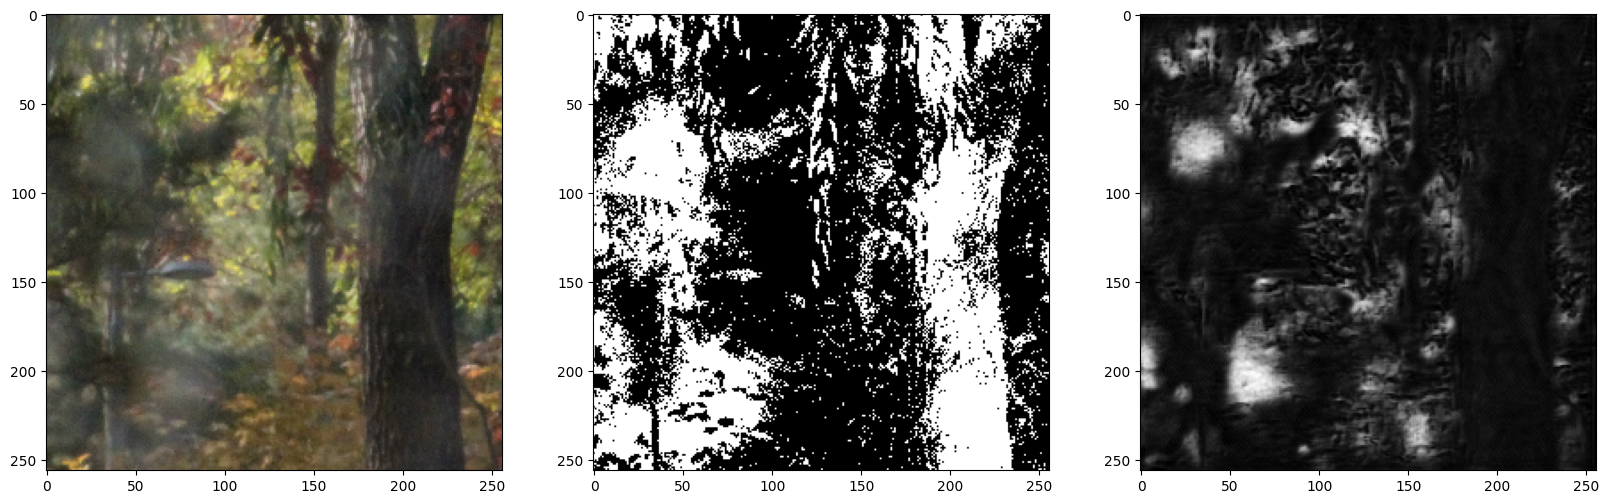

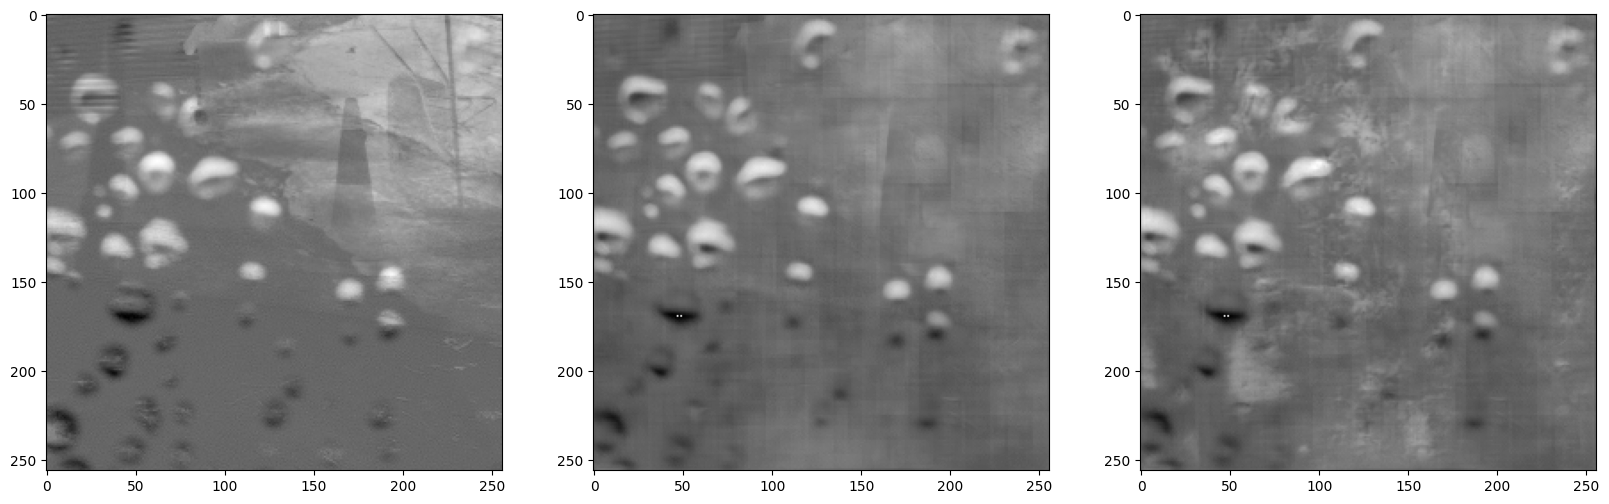

In [11]:
i = 5
img1 = rain_images[i]
img1 = np.expand_dims(img1,axis = 0)
generated_mask = np.squeeze(np.squeeze(MaskModule.predict(img1)[4],axis = -1),axis = 0)
mask = AbsMask[i]
plt.figure(figsize = (20,20))
plt.subplot(1,3,1)
plt.imshow(rain_images[i])
plt.subplot(1,3,2)
plt.imshow(mask,cmap = 'gray')
plt.subplot(1,3,3)
plt.imshow(generated_mask,cmap = 'grey')


w1 = np.ones((256,256,1))*0.8
w2 = np.ones((256,256,1))*0.2
generated_mask = np.expand_dims(generated_mask,axis = -1)
b = np.expand_dims(np.asarray(Image.open('/users/scat8633/code/GAN/A(Real)_Cam_A+B/ModelGeneratedKwonMaskFold3Retrained/'+f'{i:04}'+'_mask.png')),axis=-1)
c = np.concatenate((b/255,generated_mask),axis = -1)
d = np.average(c,axis = -1, weights = np.concatenate((w1,w2),axis = -1))
plt.figure(figsize = (20,20))
plt.subplot(1,3,1)
plt.imshow(np.asarray(Image.open('/data/scat8633/NewDatasets/A_Qian_Cam_A+B/Real/KwonMask/'+f'{i:04}'+'_mask.png')),cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(b,cmap = 'gray')
plt.subplot(1,3,3)
plt.imshow(d,cmap = 'grey')

In [ ]:
i = 765
img1 = rain_images[i]
img1 = np.expand_dims(img1,axis = 0)
generated_mask = np.squeeze(np.squeeze(MaskModule.predict(img1)[4],axis = -1),axis = 0)
#mask = AbsMask[i]
plt.figure(figsize = (20,20))
plt.subplot(1,3,1)
plt.imshow(rain_images[i])
plt.subplot(1,3,2)
#plt.imshow(mask,cmap = 'gray')
plt.subplot(1,3,3)
plt.imshow(generated_mask,cmap = 'grey')


w1 = np.ones((256,256,1))*0.7
w2 = np.ones((256,256,1))*0.3
generated_mask = np.expand_dims(generated_mask,axis = -1)
b = np.expand_dims(np.asarray(Image.open('/users/scat8633/code/GAN/(A+B)(Real)_Cam_A+B/ModelGeneratedKwonMaskFinal/'+f'{i+5889:04}'+'_mask.png')),axis=-1)
c = np.concatenate((b/255,generated_mask),axis = -1)
d = np.average(c,axis = -1, weights = np.concatenate((w1,w2),axis = -1))
plt.figure(figsize = (20,20))
plt.subplot(1,3,1)
plt.imshow(np.asarray(Image.open('/data/scat8633/NewDatasets/B_Quan/Real/KwonMask/'+f'{i:04}'+'_mask.png')),cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(b,cmap = 'gray')
plt.subplot(1,3,3)
plt.imshow(d,cmap = 'grey')

In [ ]:
i = 768
img1 = rain_images[i]
img1 = np.expand_dims(img1,axis = 0)
generated_mask = np.squeeze(np.squeeze(MaskModule.predict(img1)[4],axis = -1),axis = 0)
#mask = AbsMask[i]
plt.figure(figsize = (20,20))
plt.subplot(1,3,1)
plt.imshow(rain_images[i])
plt.subplot(1,3,2)
#plt.imshow(mask,cmap = 'gray')
plt.subplot(1,3,3)
plt.imshow(generated_mask,cmap = 'grey')


w1 = np.ones((256,256,1))*0.8
w2 = np.ones((256,256,1))*0.2
generated_mask = np.expand_dims(generated_mask,axis = -1)
b = np.expand_dims(np.asarray(Image.open('/users/scat8633/code/GAN/(A+B)(Real+Synthetic)_Cam_A+B/ModelGeneratedKwonMaskFinal/'+f'{i+5889:05}'+'_mask.png')),axis=-1)
c = np.concatenate((b/255,generated_mask),axis = -1)
d = np.average(c,axis = -1, weights = np.concatenate((w1,w2),axis = -1))
plt.figure(figsize = (20,20))
plt.subplot(1,3,1)
plt.imshow(np.asarray(Image.open('/data/scat8633/NewDatasets/B_Quan/Real+Synthetic/KwonMask/'+f'{i:05}'+'_mask.png')),cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(b,cmap = 'gray')
plt.subplot(1,3,3)
plt.imshow(d,cmap = 'grey')

In [ ]:
no_of_images = rain_images.shape[0]
s = np.empty(shape = no_of_images)
m = np.empty(shape = no_of_images)
for i in range(no_of_images):
    img1 = rain_images[i]
    img1 = np.expand_dims(img1,axis = 0)
    masks = MaskModule.predict(img1)

    generated_mask = np.squeeze(np.squeeze(masks[4],axis = 0),axis = -1)
    true_mask = AbsMask[i]

    s[i] = ssim(true_mask,generated_mask,data_range = 1, gaussian_weights=True, K1 = 0.01, K2 = 0.03, use_sample_covariance = False)
    m[i] = np.mean((true_mask - generated_mask)**2)
    print(s[i])
    print(m[i])
    print(i)

In [52]:
no_of_images = rain_images.shape[0]
for i in range(no_of_images):
    img1 = rain_images[i]
    img1 = np.expand_dims(img1,axis = 0)
    masks = MaskModule.predict(img1)
    generated_mask = np.squeeze(np.squeeze(masks[4],axis = 0),axis = -1)
    im = Image.fromarray((generated_mask*255).astype(np.uint8))
    a = f'{i+5889:05}'
    im.save('/users/scat8633/code/Novel_Model/NovelGAN/A(Real+Synthetic)_Cam_A+B/ModelGeneratedAbsMaskFold0/'+str(a)+'_mask.png')


1/1 [==============================] - 0s 215ms/step


In [16]:
def mean_std(array):
    mean = np.mean(array)
    std = np.std(array)
    print(f'Mean: {mean}')
    print(f'STD: {std}')

In [19]:
mean_std(m)

Mean: 0.06515759442921476
STD: 0.04643653648442363


In [20]:
mean_std(s)

Mean: 0.16939009279128897
STD: 0.11652086305203575
